# Machine Learning and Decision Trees

## Entropy 

We will look at how to measure entropy in a dataset/subdataset, which we will later reuse to calculate the information gain of each single feature.  
The definition of entropy is a measure of uncertainty or chaos, and is given by the below equation.
## $ Entropy = -\sum_{e=1}^{n} (P(e).log_2(P(e))) $

We'll first start by importing the necessary libraries.

In [1]:
from sklearn.utils import shuffle 
import numpy as np
import pandas as pd

The data we will be working with is the 'Software Defect Prediction Dataset' from NASA. It is composed of 498 samples (software (code) metrics). The dataset has 21 features (LOC, cyclomatic complexity, etc.).

The variable to predict, **defect**, is encoded as true if a defect is predicted, or false otherwise.

**Source: Sayyad Shirabad, J. and Menzies, T.J. (2005) The PROMISE Repository of Software Engineering Databases. School of Information Technology and Engineering, University of Ottawa, Canada . Available: http://promise.site.uottawa.ca/SERepository**


In [2]:
dataset = pd.read_csv("dataset.csv",skipinitialspace=True)
dataset=shuffle(dataset, random_state=100)
print('Attributes: ', dataset.columns)
print('Number of samples: ',len(dataset))

Attributes:  Index(['lines_code', 'cyclomatic_complexity', 'essential_complexity',
       'design_complexity', 'tot_operators_operands', 'volume',
       'program_length', 'difficulty', 'intelligence', 'effort', 'halstead',
       'time_estimator', 'line_count_halstead', 'comments_count',
       'blank_lines', 'tot_code_comment', 'unique_operators',
       'unique_operands', 'total_operators', 'total_operands', 'branch_count',
       'defect'],
      dtype='object')
Number of samples:  498


In [3]:
print ("number of features:",len(dataset.columns)-1)

number of features: 21


### Examining the first 10 rows of the dataset

In [4]:
dataset.head(10)

,lines_code,cyclomatic_complexity,essential_complexity,design_complexity,tot_operators_operands,volume,program_length,difficulty,intelligence,effort,...,line_count_halstead,comments_count,blank_lines,tot_code_comment,unique_operators,unique_operands,total_operators,total_operands,branch_count,defect
103,30.0,4.0,1.0,4.0,122.0,630.73,0.05,20.71,30.45,13065.14,...,3,3,12,0,15.0,21.0,64.0,58.0,7.0,False
136,30.0,2.0,1.0,2.0,151.0,852.22,0.07,14.68,58.05,12512.17,...,0,6,5,0,17.0,33.0,94.0,57.0,3.0,False
140,6.0,1.0,1.0,1.0,8.0,22.46,0.50,2.00,11.23,44.92,...,0,0,0,0,4.0,3.0,5.0,3.0,1.0,False
459,12.0,1.0,1.0,1.0,37.0,159.91,0.11,9.00,17.77,1439.20,...,0,1,7,0,12.0,8.0,25.0,12.0,1.0,True
353,25.0,5.0,1.0,4.0,100.0,552.36,0.05,20.16,27.40,11135.50,...,2,0,5,0,21.0,25.0,52.0,48.0,9.0,False
188,92.0,15.0,15.0,15.0,466.0,2643.35,0.02,57.00,46.37,150670.96,...,27,41,67,0,19.0,32.0,274.0,192.0,29.0,False
111,8.0,1.0,1.0,1.0,11.0,30.88,0.38,2.67,11.58,82.35,...,0,0,3,0,4.0,3.0,7.0,4.0,1.0,False
160,6.0,1.0,1.0,1.0,6.0,15.51,0.50,2.00,7.75,31.02,...,0,0,0,0,4.0,2.0,4.0,2.0,1.0,False
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
51,21.0,4.0,1.0,4.0,77.0,391.73,0.13,7.64,51.30,2991.43,...,0,23,55,0,12.0,22.0,49.0,28.0,7.0,False


**1:**   
The function entropy takes two arguments, the dataset and the name of the class column. Then returns the entropy of the dataset for the class **defect**.


In [5]:
def entropy(dataset,Class):
    probs = (dataset[Class]).value_counts(normalize=True)
    entropy = -1 * np.sum(np.log2(probs) * probs)
    return entropy

**2:**  
Calculating the entropy of the dataset

In [6]:
entropy(dataset, "defect")

0.46388256186643395

## Information Gain

Information gain measures the decrease in entropy after a dataset is split on a feature.
Now we calculate the information gain of a dataset given a candidate split_feature.

## $ information\_gain(S,A) = Entropy(S)-\sum_{i=1}^{n}(\frac{|Si|}{|S|}Entropy(S|A=i))$
**1:**  
The information_gain function takes as parameters:

1. The dataset.
2. The name of class column. (**defect** in our case)
3. A feature. (the name of a feature, **lines_code** for example)

In [7]:
def information_gain(dataset, Class, feature):
    
    values = np.unique(dataset[feature])
    summ = 0
    for i in values:
        newdataset = dataset[(dataset[feature] == i)]
        summ = summ + (len(newdataset)/len(dataset))*entropy(newdataset, Class)

    return entropy(dataset, Class) - summ

**2:**  
Calculating the information gain of feature/attribute **lines_code**.

In [8]:
information_gain(dataset,"defect","lines_code")

0.24212039188327106

#### 3:
Calculating the information gain for all the features in the dataset

In [9]:
print('Information gain of lines_code is: ', information_gain(dataset,"defect","lines_code"))
print('Information gain of cyclomatic_complexity is: ', information_gain(dataset,"defect","cyclomatic_complexity"))
print('Information gain of essential_complexity is: ', information_gain(dataset,"defect","essential_complexity"))
print('Information gain of design_complexity is: ', information_gain(dataset,"defect","design_complexity"))
print('Information gain of tot_operators_operands is: ', information_gain(dataset,"defect","tot_operators_operands"))
print('Information gain of volume is: ', information_gain(dataset,"defect","volume"))
print('Information gain of program_length is: ', information_gain(dataset,"defect","program_length"))
print('Information gain of difficulty is: ', information_gain(dataset,"defect","difficulty"))
print('Information gain of intelligence is: ', information_gain(dataset,"defect","intelligence"))
print('Information gain of effort is: ', information_gain(dataset,"defect","effort"))
print('Information gain of halstead is: ', information_gain(dataset,"defect","halstead"))
print('Information gain of time_estimator is: ', information_gain(dataset,"defect","time_estimator"))
print('Information gain of line_count_halstead is: ', information_gain(dataset,"defect","line_count_halstead"))
print('Information gain of comments_count is: ', information_gain(dataset,"defect","comments_count"))
print('Information gain of blank_lines is: ', information_gain(dataset,"defect","blank_lines"))
print('Information gain of tot_code_comment is: ', information_gain(dataset,"defect","tot_code_comment"))
print('Information gain of unique_operators is: ', information_gain(dataset,"defect","unique_operators"))
print('Information gain of unique_operands is: ', information_gain(dataset,"defect","unique_operands"))
print('Information gain of total_operators is: ', information_gain(dataset,"defect","total_operators"))
print('Information gain of total_operands is: ', information_gain(dataset,"defect","total_operands"))
print('Information gain of branch_count is: ', information_gain(dataset,"defect","branch_count"))

Information gain of lines_code is:  0.24212039188327106
Information gain of cyclomatic_complexity is:  0.0901739075136817
Information gain of essential_complexity is:  0.03390338687411826
Information gain of design_complexity is:  0.10373962126409608
Information gain of tot_operators_operands is:  0.3602487456527055
Information gain of volume is:  0.45585043335237774
Information gain of program_length is:  0.07743932213275445
Information gain of difficulty is:  0.41125845324089083
Information gain of intelligence is:  0.4342542737094792
Information gain of effort is:  0.45585043335237774
Information gain of halstead is:  0.25449473770322945
Information gain of time_estimator is:  0.45585043335237774
Information gain of line_count_halstead is:  0.07055172146011729
Information gain of comments_count is:  0.1882490302783989
Information gain of blank_lines is:  0.12910849171382466
Information gain of tot_code_comment is:  0.007038857377542451
Information gain of unique_operators is:  0.121

## Splitting Datasets Based on Information Gain
We split a dataset based on the feature which brings the highest information gain. First we find the attribute that maximize the information gain, then split the dataset based on it.  

The function **feature_to_split_on(dataset,Class, features)** takes as arguments the **dataset**, the **class name** and the **features**. It then returns the name of the attribute upon which the dataset will be split.

In [10]:
def feature_to_split_on(dataset, Class,features):
    max_gain = 0
    split = ''
    for col in features:
        if col != Class:
            if information_gain(dataset, Class, col) > max_gain:
                split = col
                max_gain = information_gain(dataset, Class, col)
    return split

In [11]:
print(feature_to_split_on(dataset, 'defect', dataset.columns ))

volume


The function **split_dataset(dataset,feature)** takes as parameters:  
1. A dataset.
2. A feature. (the feature upon which we will split the dataset)  
It returns an array of subdatasets (in the form of dataframes)  


In [12]:
def split_dataset(dataset, feature):
    subsets = []
    for layer in dataset[feature].value_counts():
        feature_layer = dataset[dataset[feature]==layer]
        subsets.append(feature_layer)
        
    return subsets

Counting the number of splits returned when we use the feature **volume**

In [13]:
print(len(split_dataset(dataset,'volume')))

387


## Iterative Dichotomiser 



The function **train_test_split(dataset, ratio)** takes a dataset as an input and returns two datasets one for training and another for testing. The ratio specifies the percentage of datapoints dedicated for testing.

For the example dataset, we have 498 rows and so calling the function with the parameters (dataset, 0.25) will return a training set with 373 rows and a testing set with 125 rows.

In [40]:
def train_test_splitt(dataset, ratio):
    testing_set = dataset.sample(frac=ratio) 
    training_set = dataset.drop(testing_set.index)
    return training_set, testing_set

In [48]:
train, test = train_test_splitt(dataset, 0.251)
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

train.shape:  (373, 22)
test.shape:  (125, 22)


Now we work with a given implementation of the iterative dichotomiser to check how the model does.

### Installing the library

In [16]:
!pip install decision-tree-id3

In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

### Importing the classifier

In [18]:
from id3 import Id3Estimator

### Adapting our train and test sets to what the classifier expects

In [19]:
trainX=train.drop(['defect'],axis=1)
trainY=train.filter(['defect'])
testX=test.drop(['defect'],axis=1)
testY=test.filter(['defect'])

### Training and using the classifier

In [47]:
estimator = Id3Estimator()
estimator.fit(trainX, trainY.values.ravel())
predictions=estimator.predict(trainX)
correct=[]
for i in range(0,len(trainY)):
    if trainY.iat[i,0]==predictions[i]:
        correct.append(1)
    else:
        correct.append(0)
print("Accuracy on train set is",sum(correct)/len(trainY)*100,"%")
print("The indexes of the misclassified rows")
print([i for i, x in enumerate(correct) if x == 0])
for i in [i for i, x in enumerate(correct) if x == 0]:
    print("Predicted", predictions[i], ", Actual", trainY.iat[i,0])
predictions=estimator.predict(testX)
correct=[]
for i in range(0,len(testY)):
    if testY.iat[i,0]==predictions[i]:
        correct.append(1)
    else:
        correct.append(0)
print("____\n")
print("Accuracy on test set is",sum(correct)/len(testY)*100,"%")
print("The indexes of the misclassified rows")
print([i for i, x in enumerate(correct) if x == 0])
for i in [i for i, x in enumerate(correct) if x == 0]:
    print("Predicted", predictions[i], ", Actual", testY.iat[i,0])

Accuracy on train set is 100.0 %
The indexes of the misclassified rows
[]
____

Accuracy on test set is 85.6 %
The indexes of the misclassified rows
[1, 6, 7, 8, 14, 19, 32, 35, 38, 43, 46, 65, 75, 82, 85, 94, 96, 113]
Predicted True , Actual False
Predicted True , Actual False
Predicted False , Actual True
Predicted True , Actual False
Predicted False , Actual True
Predicted False , Actual True
Predicted True , Actual False
Predicted False , Actual True
Predicted False , Actual True
Predicted False , Actual True
Predicted False , Actual True
Predicted True , Actual False
Predicted False , Actual True
Predicted True , Actual False
Predicted False , Actual True
Predicted True , Actual False
Predicted True , Actual False
Predicted False , Actual True


**85% accuracy** sounds like a decent result given the size of our dataset (and the fact that we didn't do any feature engineering). This however is incorrect as the dataset is imbalanced, and the data points labelled as **false** (no defect) are the dominant class.

Given the results above, we calculate the recall and precision of the class defect (denoted as **true** in the dataset).

We count the TP, FP, TN, FN, by comparing the array of predictions to that of the actual labels (available in testY). Then we calculate the precision and the recall for the class **defect**.

In [46]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(testY)): 
    if testY.iat[i,0]==predictions[i]==1:
        TP += 1
    if predictions[i]==1 and testY.iat[i,0]!=predictions[i]:
        FP += 1
    if testY.iat[i,0]==predictions[i]==0:
        TN += 1
    if predictions[i]==0 and testY.iat[i,0]!=predictions[i]:
        FN += 1

recall = TP/(TP + FN)
precision = TP/(TP + FP)


print('Recall for class defect (true) ', recall)
print('Precision for class defect (true) ', precision)

Recall for class defect (true)  0.16666666666666666
Precision for class defect (true)  0.2


**The precision and recall of the model are so low, indicating that the model fails to generalize**.

## Compairing our Decision Tree with SKlearn's


We use the **DecisionTreeClassifier** available in the **sklearn** library to train a decision tree model on the dataset we've been working on so far.    

We fine-tune the treeclassifier, using **entropy** not **gini**.           
Then we check the accuracy of the sklearn classifier and compare it to the one we implemented (partly).  

Showing the following:


- The accuracy of the model on the test set.

- The recall of the class **defective** (true).

- The precision of the class **defective** (true).

- The confusion matrix using sklearn. 


In [22]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

The accuracy of the model on the test set is:   85.6 %
Recall  0.25
Precision  0.25
Confusion Matrix  [[104   9]
 [  9   3]]


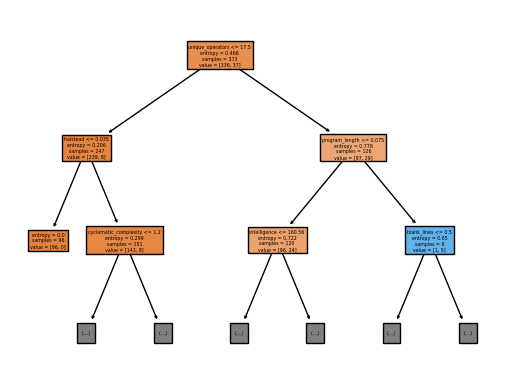

In [49]:
features = dataset.drop(dataset.columns[-1:], axis=1)
labels = dataset.drop(dataset.columns[:-1], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels)

model = tree.DecisionTreeClassifier(criterion='entropy')
model = model.fit(trainX, trainY)
y_pred = model.predict(testX)

accuracy = accuracy_score(testY, y_pred)
recall = recall_score(testY, y_pred)
precision = precision_score(testY, y_pred)
cm = confusion_matrix(testY, y_pred)

print("The accuracy of the model on the test set is:  ", accuracy*100, "%")
print("Recall ", recall)
print("Precision ", precision)
print("Confusion Matrix ", cm)

tree.plot_tree(model, feature_names=trainX.columns, max_depth=2, filled=True);

Using **matplotlib** we visualize the induced decision tree.

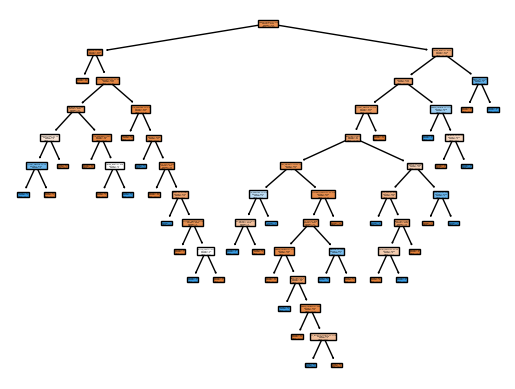

In [50]:
tree.plot_tree(model, feature_names=trainX.columns, filled=True);

## k-Fold cross validation

We assess the performance of the implemented Decision Tree using k-Fold cross validation
We run the implemented function evaluating for k = 2, 5 and 10. 

In [51]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import cross_val_score

In [52]:
def evaluate(n):
    cv = KFold(n_splits=n)
    scores = cross_val_score(model, trainX, trainY, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [53]:
s2 = evaluate(2)
s5 = evaluate(5)
s10 = evaluate(10)
print('Accuracy k2: %.3f (%.3f)' % (np.mean(s2), np.std(s2)))
print('Accuracy k5: %.3f (%.3f)' % (np.mean(s5), np.std(s5)))
print('Accuracy k10: %.3f (%.3f)' % (np.mean(s10), np.std(s10)))

Accuracy k2: 0.842 (0.002)
Accuracy k5: 0.812 (0.047)
Accuracy k10: 0.799 (0.071)
